# MNIST Digit Recognizing with CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Loading, preparing and exploring the dataset

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
y_train = train["label"]
x_train = train.drop(labels = ["label"], axis = 1)
del train

x_train.shape

(42000, 784)

In [4]:
# check if there are NaN values in the data sets
print("NaN values in train set (x_train):", x_train.isnull().values.any())
print("NaN values in label set (y_train):", y_train.isnull().values.any())
print("NaN values in test set:", test.isnull().values.any())

NaN values in train set (x_train): False
NaN values in label set (y_train): False
NaN values in test set: False


In [5]:
# Reshaping for Keras
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

# Normalizing the values
x_train = x_train.astype("float")
test = test.astype("float")
x_train /= 255.0
test /= 255.0

In [6]:
# making the labels categorical
y_train = to_categorical(y_train, num_classes = 10)

In [7]:
# splitting the training data into training and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

The label of this image is:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


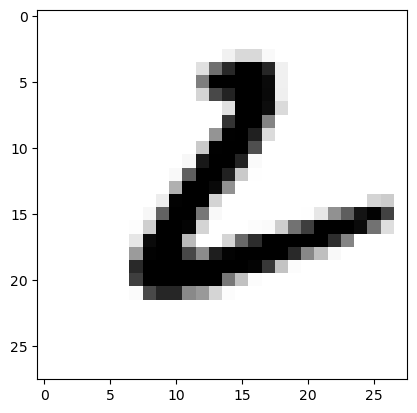

In [8]:
# checking out one random image and its label
print("The label of this image is: ", y_train[123])
plt.imshow(x_train[123], cmap= "Greys")

## CNN
I'll try and compare the performance of having two Conv2D layers and Pooling layers once, twice and three times with ascending filter numbers (see below). The other layers use values that performed the best in trials, but were not changed when comparing the three setups.
### Once the Conv2D layers and Pooling layer (32)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = "Same", activation = "relu", input_shape = (28, 28, 1)))
model.add(Conv2D(32, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [10]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", 
              metrics = ["accuracy"])
model.fit(x_train, y_train, epochs = 30, validation_data = (x_val, y_val))

Epoch 1/30
1182/1182 [==============================] - 21s 17ms/step - loss: 0.1914 - accuracy: 0.9402 - val_loss: 0.0689 - val_accuracy: 0.9800
Epoch 2/30
1182/1182 [==============================] - 19s 16ms/step - loss: 0.0693 - accuracy: 0.9776 - val_loss: 0.0494 - val_accuracy: 0.9857
Epoch 3/30
1182/1182 [==============================] - 20s 17ms/step - loss: 0.0534 - accuracy: 0.9840 - val_loss: 0.0536 - val_accuracy: 0.9838
Epoch 4/30
1182/1182 [==============================] - 19s 16ms/step - loss: 0.0444 - accuracy: 0.9854 - val_loss: 0.0386 - val_accuracy: 0.9888
Epoch 5/30
1182/1182 [==============================] - 19s 16ms/step - loss: 0.0354 - accuracy: 0.9881 - val_loss: 0.0404 - val_accuracy: 0.9886
Epoch 6/30
1182/1182 [==============================] - 20s 17ms/step - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0552 - val_accuracy: 0.9860
Epoch 7/30
1182/1182 [==============================] - 21s 18ms/step - loss: 0.0276 - accuracy: 0.9907 - val_loss: 0.0398 -

### Twice the Conv2D and Pooling layers (32, 64)

In [14]:
model2triples = Sequential()
model2triples.add(Conv2D(32, kernel_size = (3,3), padding = "Same", activation = "relu", input_shape = (28, 28, 1)))
model2triples.add(Conv2D(32, kernel_size = (3,3), padding = "Same", activation = "relu"))
model2triples.add(MaxPooling2D(pool_size = (2,2)))
model2triples.add(Dropout(0.4))

model2triples.add(Conv2D(64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model2triples.add(Conv2D(64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model2triples.add(MaxPooling2D(pool_size = (2,2)))
model2triples.add(Dropout(0.4))

model2triples.add(Flatten())
model2triples.add(Dense(256, activation = "relu"))
model2triples.add(Dropout(0.4))
model2triples.add(Dense(10, activation = "softmax"))

In [15]:
model2triples.compile(optimizer = "adam", loss = "categorical_crossentropy", 
              metrics = ["accuracy"])
model2triples.fit(x_train, y_train, epochs = 30, validation_data = (x_val, y_val))

Epoch 1/30
1182/1182 [==============================] - 36s 30ms/step - loss: 0.2203 - accuracy: 0.9298 - val_loss: 0.0561 - val_accuracy: 0.9831
Epoch 2/30
1182/1182 [==============================] - 38s 32ms/step - loss: 0.0791 - accuracy: 0.9768 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 3/30
1182/1182 [==============================] - 31s 27ms/step - loss: 0.0616 - accuracy: 0.9815 - val_loss: 0.0405 - val_accuracy: 0.9881
Epoch 4/30
1182/1182 [==============================] - 32s 27ms/step - loss: 0.0544 - accuracy: 0.9840 - val_loss: 0.0299 - val_accuracy: 0.9902
Epoch 5/30
1182/1182 [==============================] - 35s 30ms/step - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.0312 - val_accuracy: 0.9900
Epoch 6/30
1182/1182 [==============================] - 32s 27ms/step - loss: 0.0413 - accuracy: 0.9871 - val_loss: 0.0298 - val_accuracy: 0.9910
Epoch 7/30
1182/1182 [==============================] - 28s 24ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0307 -

### Three times the Conv2D and Pooling layers (24, 48, 64)

In [16]:
model3triples = Sequential()
model3triples.add(Conv2D(24, kernel_size = (3,3), padding = "Same", activation = "relu", input_shape=(28, 28, 1)))
model3triples.add(Conv2D(24, kernel_size = (3,3), padding = "Same", activation = "relu"))
model3triples.add(MaxPooling2D(pool_size = (2,2)))
model3triples.add(Dropout(0.4))

model3triples.add(Conv2D(48, kernel_size = (3,3), padding = "Same", activation = "relu"))
model3triples.add(Conv2D(48, kernel_size = (3,3), padding = "Same", activation = "relu"))
model3triples.add(MaxPooling2D(pool_size = (2,2)))
model3triples.add(Dropout(0.4))

model3triples.add(Conv2D(64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model3triples.add(Conv2D(64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model3triples.add(MaxPooling2D(pool_size = (2,2)))
model3triples.add(Dropout(0.4))

model3triples.add(Flatten())
model3triples.add(Dense(256, activation = "relu"))
model3triples.add(Dropout(0.4))
model3triples.add(Dense(10, activation = "softmax"))

In [17]:
model3triples.compile(optimizer = "adam", loss = "categorical_crossentropy", 
              metrics = ["accuracy"])
model3triples.fit(x_train, y_train, epochs = 30, validation_data = (x_val, y_val))

Epoch 1/30
1182/1182 [==============================] - 45s 37ms/step - loss: 0.3637 - accuracy: 0.8811 - val_loss: 0.0933 - val_accuracy: 0.9724
Epoch 2/30
1182/1182 [==============================] - 47s 40ms/step - loss: 0.1118 - accuracy: 0.9673 - val_loss: 0.0580 - val_accuracy: 0.9812
Epoch 3/30
1182/1182 [==============================] - 45s 38ms/step - loss: 0.0875 - accuracy: 0.9733 - val_loss: 0.0459 - val_accuracy: 0.9860
Epoch 4/30
1182/1182 [==============================] - 48s 41ms/step - loss: 0.0702 - accuracy: 0.9795 - val_loss: 0.0358 - val_accuracy: 0.9881
Epoch 5/30
1182/1182 [==============================] - 44s 38ms/step - loss: 0.0663 - accuracy: 0.9803 - val_loss: 0.0331 - val_accuracy: 0.9910
Epoch 6/30
1182/1182 [==============================] - 47s 39ms/step - loss: 0.0607 - accuracy: 0.9816 - val_loss: 0.0379 - val_accuracy: 0.9879
Epoch 7/30
1182/1182 [==============================] - 46s 39ms/step - loss: 0.0560 - accuracy: 0.9834 - val_loss: 0.0493 -

## Evaluation
Using the best combination from above: 

In [18]:
y_pred = model3triples.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_val, axis = 1) 
accuracy_score(y_true, y_pred_classes)

132/132 [==============================] - 1s 4ms/step


0.9930952380952381

### Confusion matrix

In [19]:
confusion_matrix(y_true, y_pred_classes)

array([[410,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 483,   0,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0, 403,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0, 414,   0,   1,   0,   0,   2,   0],
       [  0,   0,   1,   0, 456,   0,   1,   0,   0,   3],
       [  0,   0,   0,   1,   0, 367,   3,   0,   1,   0],
       [  1,   1,   0,   0,   0,   0, 410,   0,   1,   0],
       [  0,   0,   1,   0,   0,   0,   0, 445,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 381,   1],
       [  1,   0,   0,   0,   3,   0,   0,   2,   1, 402]], dtype=int64)

### Running it on the test set and preparing the submission file

In [20]:
# predicting the test set images
results = model3triples.predict(test)
results = np.argmax(results, axis = 1)
results = pd.Series(results, name = "Label")

875/875 [==============================] - 4s 4ms/step


In [21]:
# converting the dataframe into a csv file
submission = pd.concat([pd.Series(range(1,28001), name = "ImageId"), results], axis = 1)
submission.to_csv("./data/submission.csv", index = False)